# Homework solution PyTorch Diabetes


In [1]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


## Loading the dataset

In [2]:
import torch

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [4]:
dataset = pd.read_csv('diabetes.csv')

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Data transformation


In [8]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype = torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

In [9]:
torch_dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [10]:
train_loader = torch.utils.data.DataLoader(torch_dataset, batch_size=10)

## Neural network structure

In [11]:
# 8 -> 5 -> 5 -> 1
network = nn.Sequential(nn.Linear(8, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 5),
                          nn.Sigmoid(),
                          nn.Linear(5, 1),
                          nn.Sigmoid())

In [12]:
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [13]:
epochs = 1000
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    X, y = data
    optimizer.zero_grad()

    predictions = network.forward(X)
    loss = loss_function(predictions, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch   1: loss 0.78617
Epoch   2: loss 0.73700
Epoch   3: loss 0.70423
Epoch   4: loss 0.68211
Epoch   5: loss 0.66815
Epoch   6: loss 0.66034
Epoch   7: loss 0.65646
Epoch   8: loss 0.65468
Epoch   9: loss 0.65386
Epoch  10: loss 0.65343
Epoch  11: loss 0.65316
Epoch  12: loss 0.65294
Epoch  13: loss 0.65273
Epoch  14: loss 0.65251
Epoch  15: loss 0.65227
Epoch  16: loss 0.65201
Epoch  17: loss 0.65174
Epoch  18: loss 0.65145
Epoch  19: loss 0.65113
Epoch  20: loss 0.65079
Epoch  21: loss 0.65044
Epoch  22: loss 0.65007
Epoch  23: loss 0.64968
Epoch  24: loss 0.64927
Epoch  25: loss 0.64885
Epoch  26: loss 0.64843
Epoch  27: loss 0.64799
Epoch  28: loss 0.64755
Epoch  29: loss 0.64711
Epoch  30: loss 0.64666
Epoch  31: loss 0.64620
Epoch  32: loss 0.64574
Epoch  33: loss 0.64528
Epoch  34: loss 0.64481
Epoch  35: loss 0.64433
Epoch  36: loss 0.64385
Epoch  37: loss 0.64335
Epoch  38: loss 0.64285
Epoch  39: loss 0.64234
Epoch  40: loss 0.64181
Epoch  41: loss 0.64127
Epoch  42: loss 

## Evaluate

In [14]:
network.eval()

Sequential(
  (0): Linear(in_features=8, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [15]:
predictions = network.forward(X_test)
predictions = (predictions >= 0.5)

In [16]:
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

0.7987012987012987
[[93 14]
 [17 30]]


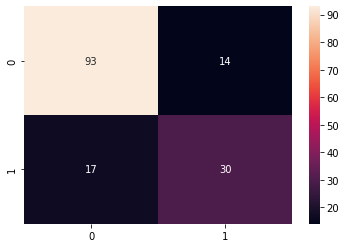

In [17]:
import seaborn as sns
sns.heatmap(cm, annot=True)